In [1]:
# first import the usual libraries
import pandas as pd, numpy as np, seaborn as sns
%matplotlib inline

In [ ]:
# import data about the medical condition kyphosis and people who have surgery for it
# we are going to use this data to make predictions on the future success rate of the surgery

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


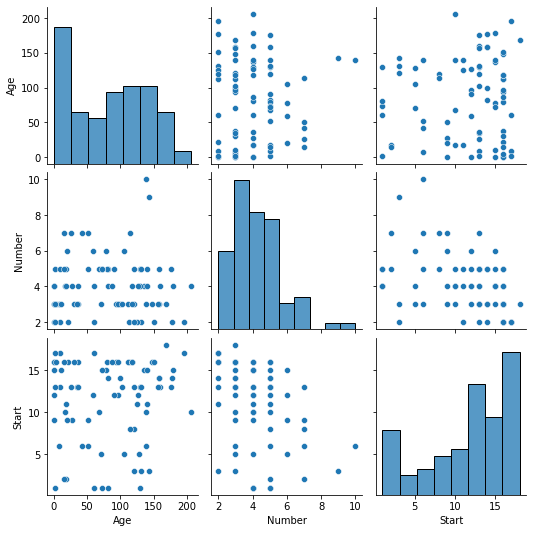

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
# we want to know if the patient has no kyphosis after the surgery

In [7]:
X=df.drop('Kyphosis',axis=1)

y=df['Kyphosis']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
predictions =dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[14  5]
 [ 3  3]]


              precision    recall  f1-score   support

      absent       0.82      0.74      0.78        19
     present       0.38      0.50      0.43         6

    accuracy                           0.68        25
   macro avg       0.60      0.62      0.60        25
weighted avg       0.72      0.68      0.69        25



In [16]:
# remember that the random forests are just an ensemble of decision trees with certain caveats
from sklearn.ensemble import RandomForestClassifier

In [17]:
# set up a random Forest classifier object with a random number
rfc = RandomForestClassifier(n_estimators=200)

In [18]:
# fit the forest to training data set
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  2]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [24]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64